In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM


import src.lstm_helper as lh
import src.time_series_helpers as th

/Users/nicochen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/nicochen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/nicochen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/nicochen/opt/anaconda3/lib/python3.7/site-packages/ten

In [5]:
#reference:https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
# https://heartbeat.fritz.ai/building-a-neural-network-from-scratch-using-python-part-1-6d399df8d432
# https://www.kaggle.com/alexdance/store-item-combination-part-6-deep-learning
# https://www.tensorflow.org/tutorials/structured_data/time_series

### Predict future sales but non time-series models.

#### Fearture engineering

In [9]:
#load dataset that is processed by store by item
path = 'data/store_item.csv'
df = pd.read_csv(path)

In [10]:
#set datatime to index
df['date'] =  pd.to_datetime(df['date'])
df = df.set_index('date')
df.shape

(1826, 500)

In [11]:
# extract columns names
columns = df.columns.tolist()
total_labels = len(columns)
print(f'total labels: {total_labels}')
columns[:10]

total labels: 500


['s1_i1',
 's1_i2',
 's1_i3',
 's1_i4',
 's1_i5',
 's1_i6',
 's1_i7',
 's1_i8',
 's1_i9',
 's1_i10']

## Build a  multi-output predictions
multi-output predictions.

### 10 output

In [12]:
# predict 3 months sales for 10 store-item 

In [ ]:
output_length =92 # the number days we would like to predict
#time_stepts in LSTM: the recurrent cell gets unrolled to a specified length 
time_steps = 14    #recurrent cell numbers,two weeks
labels_width =10
output_length =92
lstm_units = 128*2


In [113]:
df_fc_500 = pd.DataFrame(index=df.index[-output_length:])
df_fc_500.shape

(92, 0)

In [120]:
# for i in range(labels_width, total_labels+1,labels_width): 
df_fc_500 = pd.DataFrame(index=df.index[-output_length:])

for i in range(10, 501,10): 
    # split into training, validation, and test sets.
    df_10 = df.iloc[:,i-10:i]
    output_cols = df_10.columns.tolist()
    train,test,valid = lh.split_data(df_10,output_length, time_steps)
    
    X_train, y_train = lh.window_generator(train, train.iloc[:,:len(output_cols)],time_steps)
    X_test,  y_test  = lh.window_generator(test, test.iloc[:,:len(output_cols)],time_steps)
    
    
    model = lh.lstm_model_10(X_train,lstm_units)
    history = model.fit(
                X_train, y_train,
                epochs=30,
                batch_size=30,
                validation_split=0.1,
                verbose=1,
                shuffle=False)
    y_pred = model.predict(X_test)
    df_forecast = pd.DataFrame(y_pred, index=valid.index, columns=valid.columns + '_forecast')
    df_fc_500 =pd.concat([df_fc_500, df_forecast], axis = 'columns')
    
    
    

Train on 1535 samples, validate on 171 samples
Epoch 1/30
1535/1535 [==============================] - 4s 2ms/sample - loss: 1170.2815 - val_loss: 1325.4657
Epoch 2/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 301.0162 - val_loss: 443.0299
Epoch 3/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 151.8071 - val_loss: 296.6311
Epoch 4/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 122.3603 - val_loss: 262.8426
Epoch 5/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 111.5870 - val_loss: 240.1732
Epoch 6/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 103.1515 - val_loss: 228.7451
Epoch 7/30
1535/1535 [==============================] - 2s 2ms/sample - loss: 104.9811 - val_loss: 213.0490
Epoch 8/30
1535/1535 [==============================] - 2s 2ms/sample - loss: 101.6262 - val_loss: 240.6857
Epoch 9/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 101.4100 

Epoch 30/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 83.7803 - val_loss: 159.8002
Train on 1535 samples, validate on 171 samples
Epoch 1/30
1535/1535 [==============================] - 4s 3ms/sample - loss: 2992.3210 - val_loss: 4019.9610
Epoch 2/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 1034.7796 - val_loss: 1420.4828
Epoch 3/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 347.2921 - val_loss: 661.9185
Epoch 4/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 279.8222 - val_loss: 620.1073
Epoch 5/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 246.4209 - val_loss: 540.4292
Epoch 6/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 216.6879 - val_loss: 468.5443
Epoch 7/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 211.4318 - val_loss: 523.0884
Epoch 8/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 216.758

Epoch 14/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 280.6077 - val_loss: 598.1073
Epoch 15/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 268.6372 - val_loss: 485.9747
Epoch 16/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 262.6637 - val_loss: 679.9883
Epoch 17/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 255.6340 - val_loss: 590.8887
Epoch 18/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 259.5770 - val_loss: 639.8610
Epoch 19/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 251.4851 - val_loss: 710.6667
Epoch 20/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 254.4167 - val_loss: 850.8373
Epoch 21/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 259.6615 - val_loss: 530.8451
Epoch 22/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 262.5296 - val_loss: 637.8738
Epoch 23/30
1535/15

1535/1535 [==============================] - 2s 1ms/sample - loss: 206.7382 - val_loss: 454.6455
Epoch 13/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 201.0080 - val_loss: 453.1166
Epoch 14/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 215.1294 - val_loss: 518.5758
Epoch 15/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 214.9986 - val_loss: 470.2232
Epoch 16/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 212.1554 - val_loss: 394.1722
Epoch 17/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 204.1415 - val_loss: 488.0369
Epoch 18/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 202.9649 - val_loss: 466.0970
Epoch 19/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 215.9221 - val_loss: 540.5587
Epoch 20/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 206.5234 - val_loss: 489.3082
Epoch 21/30
1535/1535 [========

1535/1535 [==============================] - 2s 1ms/sample - loss: 190.1874 - val_loss: 450.1656
Epoch 11/30
1535/1535 [==============================] - 2s 2ms/sample - loss: 177.5740 - val_loss: 521.7524
Epoch 12/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 174.4002 - val_loss: 425.5945
Epoch 13/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 180.9640 - val_loss: 509.2917
Epoch 14/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 177.4779 - val_loss: 548.6943
Epoch 15/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 177.8789 - val_loss: 461.8287
Epoch 16/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 169.2877 - val_loss: 398.1775
Epoch 17/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 175.2820 - val_loss: 453.5984
Epoch 18/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 180.3548 - val_loss: 473.5971
Epoch 19/30
1535/1535 [========

1535/1535 [==============================] - 2s 1ms/sample - loss: 99.1161 - val_loss: 246.7780
Epoch 9/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 97.1905 - val_loss: 273.8312
Epoch 10/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 95.9503 - val_loss: 253.3638
Epoch 11/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 95.9180 - val_loss: 270.2240
Epoch 12/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 95.0993 - val_loss: 230.9535
Epoch 13/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 96.8602 - val_loss: 245.3082
Epoch 14/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 94.8462 - val_loss: 240.8782
Epoch 15/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 94.1881 - val_loss: 257.8165
Epoch 16/30
1535/1535 [==============================] - 2s 1ms/sample - loss: 94.8100 - val_loss: 237.2501
Epoch 17/30
1535/1535 [==================

1535/1535 [==============================] - 3s 2ms/sample - loss: 96.8582 - val_loss: 282.4064
Epoch 8/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 96.1609 - val_loss: 231.2060
Epoch 9/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 97.5373 - val_loss: 259.5364
Epoch 10/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 97.3734 - val_loss: 278.3107
Epoch 11/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 93.9262 - val_loss: 244.2249
Epoch 12/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 93.9766 - val_loss: 220.1347
Epoch 13/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 96.8358 - val_loss: 238.0757
Epoch 14/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 95.4945 - val_loss: 246.3187
Epoch 15/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 94.0150 - val_loss: 209.2810
Epoch 16/30
1535/1535 [===================

1535/1535 [==============================] - 3s 2ms/sample - loss: 84.9312 - val_loss: 222.6536
Epoch 7/30
1535/1535 [==============================] - 2s 2ms/sample - loss: 85.7301 - val_loss: 211.2770
Epoch 8/30
1535/1535 [==============================] - 2s 2ms/sample - loss: 83.8363 - val_loss: 221.9626
Epoch 9/30
1535/1535 [==============================] - 2s 2ms/sample - loss: 82.2784 - val_loss: 216.7685
Epoch 10/30
1535/1535 [==============================] - 2s 2ms/sample - loss: 83.1974 - val_loss: 197.6532
Epoch 11/30
1535/1535 [==============================] - 2s 2ms/sample - loss: 79.7295 - val_loss: 203.2406
Epoch 12/30
1535/1535 [==============================] - 2s 2ms/sample - loss: 79.8134 - val_loss: 180.0688
Epoch 13/30
1535/1535 [==============================] - 2s 2ms/sample - loss: 81.7283 - val_loss: 251.2902
Epoch 14/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 82.7190 - val_loss: 175.3142
Epoch 15/30
1535/1535 [====================

1535/1535 [==============================] - 2s 2ms/sample - loss: 346.3198 - val_loss: 757.8945
Epoch 6/30
1535/1535 [==============================] - 2s 2ms/sample - loss: 292.3010 - val_loss: 685.8946
Epoch 7/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 277.8526 - val_loss: 695.1983
Epoch 8/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 259.5174 - val_loss: 593.2029
Epoch 9/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 255.3426 - val_loss: 558.7823
Epoch 10/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 246.4588 - val_loss: 760.7310
Epoch 11/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 248.6826 - val_loss: 629.0270
Epoch 12/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 241.4883 - val_loss: 552.6996
Epoch 13/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 244.4931 - val_loss: 583.3694
Epoch 14/30
1535/1535 [============

1535/1535 [==============================] - 3s 2ms/sample - loss: 321.8125 - val_loss: 639.5833
Epoch 4/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 235.5443 - val_loss: 521.9545
Epoch 5/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 212.5114 - val_loss: 495.3184
Epoch 6/30
1535/1535 [==============================] - 4s 2ms/sample - loss: 198.2916 - val_loss: 504.2573
Epoch 7/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 189.3462 - val_loss: 477.9132
Epoch 8/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 196.0847 - val_loss: 415.1354
Epoch 9/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 185.5501 - val_loss: 443.8936
Epoch 10/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 184.1487 - val_loss: 436.6252
Epoch 11/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 180.9698 - val_loss: 402.2400
Epoch 12/30
1535/1535 [==============

1535/1535 [==============================] - 14s 9ms/sample - loss: 3274.7419 - val_loss: 4383.4629
Epoch 2/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 1262.5932 - val_loss: 1707.9467
Epoch 3/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 432.1107 - val_loss: 746.7485
Epoch 4/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 292.8638 - val_loss: 604.9483
Epoch 5/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 258.8791 - val_loss: 550.8827
Epoch 6/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 245.8577 - val_loss: 571.8405
Epoch 7/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 245.0054 - val_loss: 501.1083
Epoch 8/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 220.9293 - val_loss: 501.4640
Epoch 9/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 211.3398 - val_loss: 452.3370
Epoch 10/30
1535/1535 [===========

In [122]:
 df_fc_500.shape

(92, 500)

In [124]:
df_fc_500.to_csv('data/lstm_10_output_predictions.csv')

In [4]:
df_fc_500.head()

NameError: name 'df_fc_500' is not defined

In [5]:
 df_results = pd.read_csv('data/lstm_10_output_predictions.csv')

In [6]:
 df_results.head()

,date,s1_i1_forecast,s1_i2_forecast,s1_i3_forecast,s1_i4_forecast,s1_i5_forecast,s1_i6_forecast,s1_i7_forecast,s1_i8_forecast,s1_i9_forecast,...,s10_i41_forecast,s10_i42_forecast,s10_i43_forecast,s10_i44_forecast,s10_i45_forecast,s10_i46_forecast,s10_i47_forecast,s10_i48_forecast,s10_i49_forecast,s10_i50_forecast
0,2017-10-01,21.983830,58.788387,37.097843,22.341757,18.474579,59.543495,58.854244,77.235790,51.989160,...,26.668932,44.250630,62.247280,35.400974,97.04318,71.404625,26.426828,61.906963,35.629623,79.414665
1,2017-10-02,21.253641,57.089146,36.030785,21.832000,17.993626,57.945145,57.178932,75.138870,50.555733,...,26.709879,44.299540,62.535397,35.514720,97.32354,71.209130,26.661747,62.200005,35.745724,79.440445
2,2017-10-03,19.590227,52.764570,33.357860,20.065280,16.745731,53.402560,52.691566,69.520780,46.550102,...,22.828690,37.767937,53.819313,30.914898,84.19037,60.964880,22.792097,53.802593,30.514004,68.179650
3,2017-10-04,20.462664,54.664623,34.645880,20.886970,17.383965,55.548153,54.998684,72.379950,48.599920,...,23.701870,39.448784,55.724125,31.965660,87.09224,63.492275,23.564829,55.584160,31.736294,70.908300
4,2017-10-05,20.195715,54.433098,34.325768,20.916151,17.189049,55.097855,54.372627,71.772964,48.157017,...,25.050335,41.511020,58.909466,33.667305,91.95006,66.892280,24.964930,58.668793,33.528320,74.829704


In [11]:
#set datatime to index
df_results['date'] =  pd.to_datetime(df_results['date'])
df_results = df_results.set_index('date')
df_results.shape

(92, 500)

In [12]:
df_submmit = pd.concat(df_results.iloc[:,i] for i in range(df_results.shape[1]))

df_submmit =pd.DataFrame(df_submmit,columns=['LSTM_10_output_forecast'])

In [13]:
df_submmit.head()

,LSTM_10_output_forecast
date,
2017-10-01,21.983830
2017-10-02,21.253641
2017-10-03,19.590227
2017-10-04,20.462664
2017-10-05,20.195715


In [16]:
df_submmit.shape

(46000, 1)

In [19]:
df_submmit.to_csv('data/LSTM_10_output_forecast.csv',index =True)

In [20]:
df_submmit[92:184]

,LSTM_10_output_forecast
date,
2017-10-01,58.788387
2017-10-02,57.089146
2017-10-03,52.764570
2017-10-04,54.664623
2017-10-05,54.433098
...,...
2017-12-27,47.524902
2017-12-28,48.837940
2017-12-29,50.028885


In [ ]:
lstm_10_output_submmit =

In [119]:
 df_fc_500.columns

Index(['s1_i1_forecast', 's1_i2_forecast', 's1_i3_forecast', 's1_i4_forecast',
       's1_i5_forecast', 's1_i6_forecast', 's1_i7_forecast', 's1_i8_forecast',
       's1_i9_forecast', 's1_i10_forecast', 's1_i11_forecast',
       's1_i12_forecast', 's1_i13_forecast', 's1_i14_forecast',
       's1_i15_forecast', 's1_i16_forecast', 's1_i17_forecast',
       's1_i18_forecast', 's1_i19_forecast', 's1_i20_forecast',
       's1_i21_forecast', 's1_i22_forecast', 's1_i23_forecast',
       's1_i24_forecast', 's1_i25_forecast', 's1_i26_forecast',
       's1_i27_forecast', 's1_i28_forecast', 's1_i29_forecast',
       's1_i30_forecast'],
      dtype='object')

In [72]:
sampling =np.arange(10)
sampling

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [110]:
df_10 = df.iloc[:,sampling]
df_10.head()

,s1_i1,s1_i2,s1_i3,s1_i4,s1_i5,s1_i6,s1_i7,s1_i8,s1_i9,s1_i10
date,,,,,,,,,,
2013-01-01,13,33,15,10,11,31,25,33,18,37
2013-01-02,11,43,30,11,6,36,23,37,23,34
2013-01-03,14,23,14,8,8,18,34,38,25,32
2013-01-04,13,18,10,19,9,19,36,54,22,45
2013-01-05,10,34,23,12,8,31,38,51,29,35


In [111]:
# split into training, validation, and test sets.
output_cols = df_10.columns.tolist()
output_length =92 # the number days we would like to predict
#time_stepts in LSTM: the recurrent cell gets unrolled to a specified length 
time_steps = 14    #recurrent cell numbers,two weeks

train,test,valid = lh.split_data(df_10,output_length, time_steps)

In [112]:
print('All shapes are:    (train, ,test, valid,labels)')
print(f'train dataset shape: {train.shape}')
print(f'test dataset shape : {test.shape}')
print(f'valid dataset shape: {valid.shape}')
print(f'labels width       : {len(output_cols)}')

All shapes are:    (train, ,test, valid,labels)
train dataset shape: (1720, 10)
test dataset shape : (106, 10)
valid dataset shape: (92, 10)
labels width       : 10


In [32]:
# Genarate window datasets
# One of the most difficult parts of Deep Learning modelling is to get the dataset in the right format 
# The function completes that process
X_train, y_train = lh.window_generator(train, train.iloc[:,:len(output_cols)],time_steps)
X_test,  y_test  = lh.window_generator(test, test.iloc[:,:len(output_cols)],time_steps)

print('All shapes are: (X_train, y_train, X_test,  y_test)')
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test  shape: {X_test.shape}')
print(f'y_test  shape: {y_test.shape}')

All shapes are: (X_train, y_train, X_test,  y_test)
X_train shape: (1706, 14, 10)
y_train shape: (1706, 10)
X_test  shape: (92, 14, 10)
y_test  shape: (92, 10)


In [33]:
# call lstm model
lstm_units = 128*2
model = Sequential()
model.add(LSTM(
            units = lstm_units,
            input_shape=(X_train.shape[1], X_train.shape[2]),
            return_sequences=False
            ))
model.add(Activation("tanh"))
model.add(Dropout(0.2))

model.add(Dense(units=X_train.shape[2]*3))
model.add(Dense(units=X_train.shape[2]))
model.compile(
                loss='mse',
                optimizer="rmsprop") 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [34]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=30,
    validation_split=0.1,
    verbose=1,
    shuffle=False)

Train on 1535 samples, validate on 171 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 1037.8387 - val_loss: 1060.1791
Epoch 2/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 220.7975 - val_loss: 371.8228
Epoch 3/30
1535/1535 [==============================] - 2s 2ms/sample - loss: 134.9266 - val_loss: 269.5525
Epoch 4/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 116.1310 - val_loss: 249.9598
Epoch 5/30
1535/1535 [==============================] - 2s 2ms/sample - loss: 106.8439 - val_loss: 241.4979
Epoch 6/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 102.4422 - val_loss: 232.2388
Epoch 7/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 99.5178 - val_loss: 267.5730
Epoch 8/30
1535/1535 [==============================] - 3s 2ms/sample - loss: 97.1544 - val_loss: 201.

In [121]:
y_pred = model.predict(X_test)
y_pred.shape

(92, 10)

In [37]:
df_forecast = pd.DataFrame(y_pred, index=valid.index, columns=valid.columns + '_forecast')
df_forecast

,s1_i1_forecast,s1_i2_forecast,s1_i3_forecast,s1_i4_forecast,s1_i5_forecast,s1_i6_forecast,s1_i7_forecast,s1_i8_forecast,s1_i9_forecast,s1_i10_forecast
date,,,,,,,,,,
2017-10-01,22.043316,58.918194,37.516113,22.933584,18.642162,60.456245,59.408146,78.266808,52.580742,74.677979
2017-10-02,21.067923,56.986099,36.173843,22.122311,17.932655,58.667759,57.432976,76.078888,50.912952,72.548141
2017-10-03,19.755001,53.570499,33.951923,20.791481,16.992857,54.788315,53.696980,71.182106,47.660343,68.025597
2017-10-04,20.234289,54.651878,34.822590,21.026838,17.206154,56.200264,54.983440,72.866081,48.858063,69.607941
2017-10-05,20.234335,54.950420,34.845882,21.259880,17.318089,56.392338,55.250877,73.272789,49.028992,69.773613
...,...,...,...,...,...,...,...,...,...,...
2017-12-27,17.479362,46.969257,29.696205,18.515974,15.026894,47.872314,46.919693,62.424320,41.601440,59.219223
2017-12-28,18.331133,49.085522,31.206772,19.224804,15.526481,50.150368,49.201042,65.399681,43.537998,61.926628
2017-12-29,19.244894,52.182056,32.915131,20.137739,16.563667,53.209858,52.381256,69.487778,46.368805,66.479012


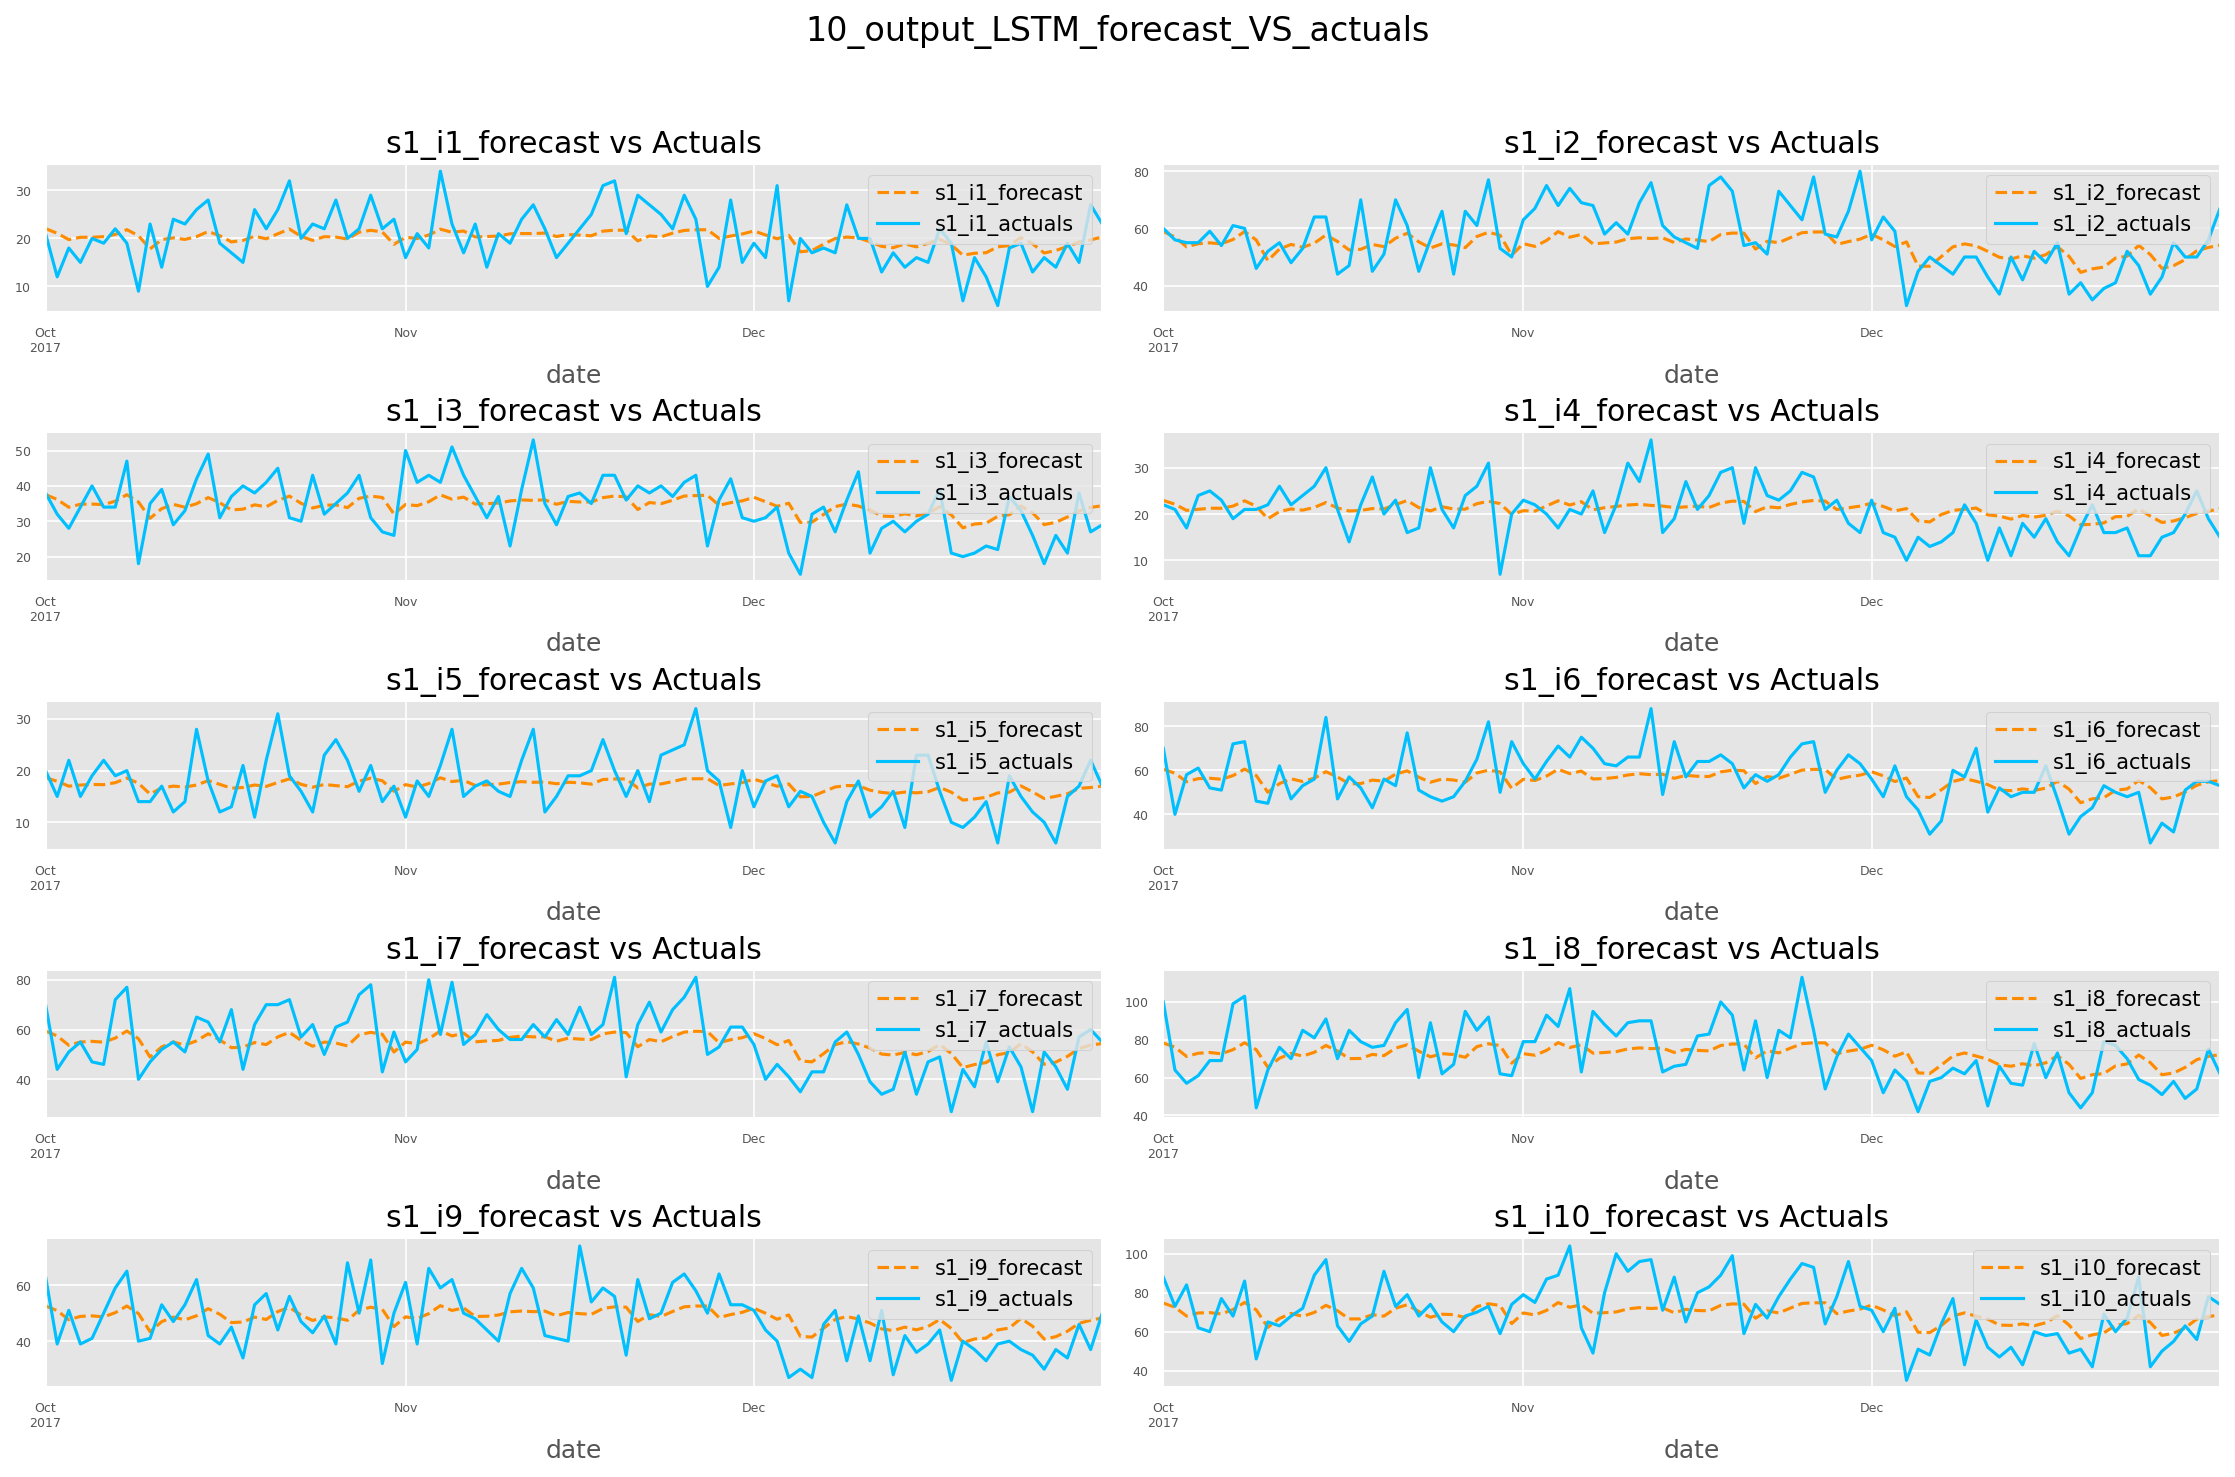

In [38]:
figtitle = '10_output_LSTM_forecast_VS_actuals'
prediction_len =df_forecast.shape[1]
th.plot_results_multiple(df_forecast, valid, prediction_len, figtitle)

In [39]:
RMSE_s1_i1  = th.rmse_calculate(df_forecast.iloc[:,0],valid.iloc[:,0])
print(RMSE_s1_i1)

5.37


In [40]:
RMSE_s1_i2  = th.rmse_calculate(df_forecast.iloc[:,1],valid.iloc[:,1])
print(RMSE_s1_i2)

9.59


In [41]:
RMSE_s1_i3  = th.rmse_calculate(df_forecast.iloc[:,2],valid.iloc[:,2])
print(RMSE_s1_i3)

7.08


In [ ]:
df_fc_500 =pd.concat([df_fc_500, df_forecast], axis = 'columns')

In [ ]:
df_fc_500 =pd.concat([df_fc_500, df_forecast], axis = 'columns')